In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# I like seaborn to make plots pretty:
import seaborn as sns
sns.set(context='poster', style='dark')

from sklearn import cross_validation
from sklearn import ensemble, feature_extraction, preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import time

In [3]:
virus_df = pd.read_csv('bunyaviruses.csv')
virus_df.drop(['Unnamed: 0'], 1, inplace=True)

In [34]:
labels_total = virus_df.species
unique_labels = np.unique(labels_total)
# unique_labels

X_total = virus_df.drop(['species'], 1, inplace=False)

In [23]:
labels_dict = {}

for i in range(len(unique_labels)):
    labels_dict[unique_labels[i]] = i
    
labels_dict = { unique_labels[i]: i for i in range(len(unique_labels)) }

labels_dict

{'hantavirus': 0,
 'nairovirus': 1,
 'negevirus': 2,
 'ortobunyavirus': 3,
 'phlebovirus': 4,
 'unclass': 5}

In [29]:
y_total = np.array([ labels_dict[i] for i in labels_total ])
y_total

array([5, 5, 5, ..., 3, 3, 3])

In [33]:
colors = ['green', 'blue', 'orange', 'cyan', 'purple', 'red']

colors_labels = []
color_labels = np.array(colors)[y_total]
color_labels

array(['red', 'red', 'red', ..., 'cyan', 'cyan', 'cyan'], 
      dtype='<U6')

In [62]:
unclass_ix = (labels_total=='unclass').values
unclass_ix

array([  3.20251503,  -0.73625759,  -8.65216524, ...,  41.73062927,
        -5.79221417,  -7.27134489])

In [99]:
list(labels_dict.keys())

['ortobunyavirus',
 'hantavirus',
 'negevirus',
 'nairovirus',
 'phlebovirus',
 'unclass']

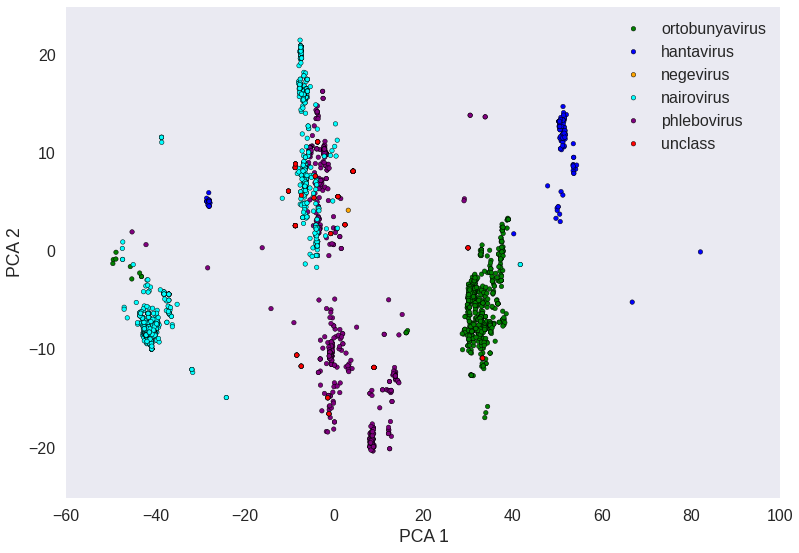

In [108]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components=3)
pca.fit(X_total)
# plt.plot(pca.components_[0,:])
X_total_pca = pca.transform(X_total)


plt.scatter(X_total_pca[~unclass_ix,0], X_total_pca[~unclass_ix,1], c = color_labels[~unclass_ix], marker='o')
plt.scatter(X_total_pca[unclass_ix,0], X_total_pca[unclass_ix,1], c = color_labels[unclass_ix], marker='o')
plt.xlim(-60, 100)
plt.ylim(-25, 25)

for i in range(len(labels_dict)):
    plt.scatter(-100, -100, c=colors[i], label=list(labels_dict.keys())[i])

plt.legend(loc='best');
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

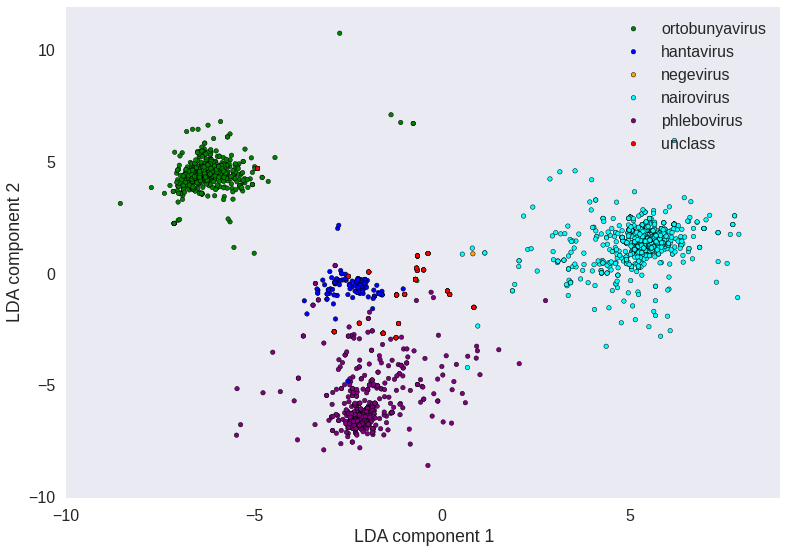

In [111]:
from sklearn.lda import LDA

lda = LDA(n_components=9)
total_lda = lda.fit(X_total, labels_total).transform(X_total)

plt.scatter(total_lda[~unclass_ix,0], total_lda[~unclass_ix,1], c = color_labels[~unclass_ix], marker='o')
plt.scatter(total_lda[unclass_ix,0], total_lda[unclass_ix,1], c = color_labels[unclass_ix], marker='o')
plt.xlim(-10, 9)
plt.ylim(-10, 12)

for i in range(len(labels_dict)):
    plt.scatter(-100, -100, c=colors[i], label=list(labels_dict.keys())[i])

plt.legend(loc='best');
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')

### Let's try to separate the unclassed instances out and train LDA only on the classed ones

In [120]:
unclass_df = virus_df[virus_df.species=='unclass']
class_df =  virus_df[virus_df.species!='unclass']
unclass_df.head()

X_class = class_df.drop(['species'], 1, inplace=False).values
X_unclass = unclass_df.drop(['species'], 1, inplace=False).values
labels_class = class_df.species.values

labels_class = class_df.species
unique_labels = np.unique(labels_class)

labels_dict = {}
    
labels_dict = { unique_labels[i]: i for i in range(len(unique_labels)) }
labels_dict

y_class = np.array([ labels_dict[i] for i in labels_class ])
y_class

array([2, 2, 2, ..., 3, 3, 3])

In [122]:
colors = ['green', 'blue', 'orange', 'cyan', 'purple']

class_colors_labels = []
class_color_labels = np.array(colors)[y_class]

In [124]:
lda = LDA(n_components=2)
class_lda = lda.fit(X_class, y_class).transform(X_class)
unclass_lda = lda.fit(X_class, y_class).transform(X_unclass)

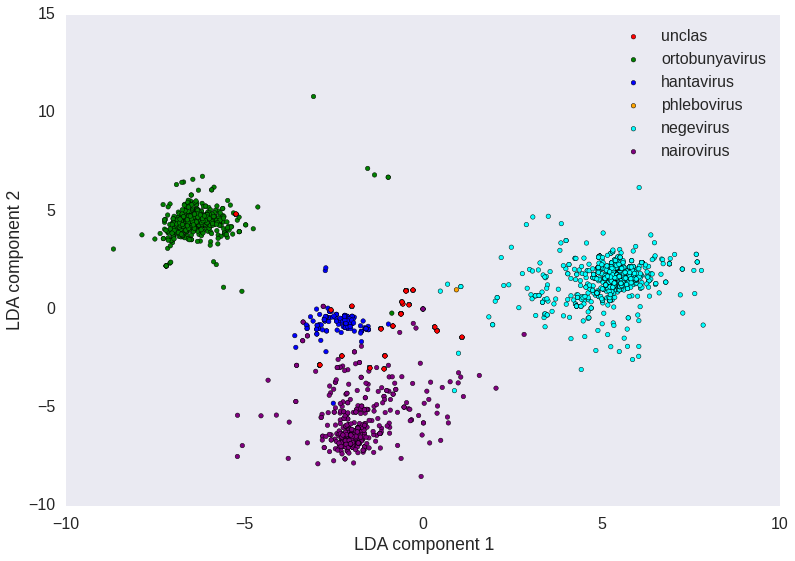

In [129]:
plt.scatter(class_lda[:,0], class_lda[:,1], c = class_color_labels, marker='o')
plt.scatter(unclass_lda[:,0], unclass_lda[:,1], c = 'red', marker='o', label='unclas')


for i in range(len(labels_dict)):
    plt.scatter(0, 0, c=colors[i], label=list(labels_dict.keys())[i])

plt.legend(loc='best');
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')